In [2]:
!pip install opencv-python

In [2]:
import cv2

imagePath = 'test-image.png'

In [4]:
img = cv2.imread(imagePath)

In [6]:
img.shape

(774, 594, 3)

In [8]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
gray_image.shape

(774, 594)

In [12]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [14]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [16]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [18]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(593.5), np.float64(773.5), np.float64(-0.5))

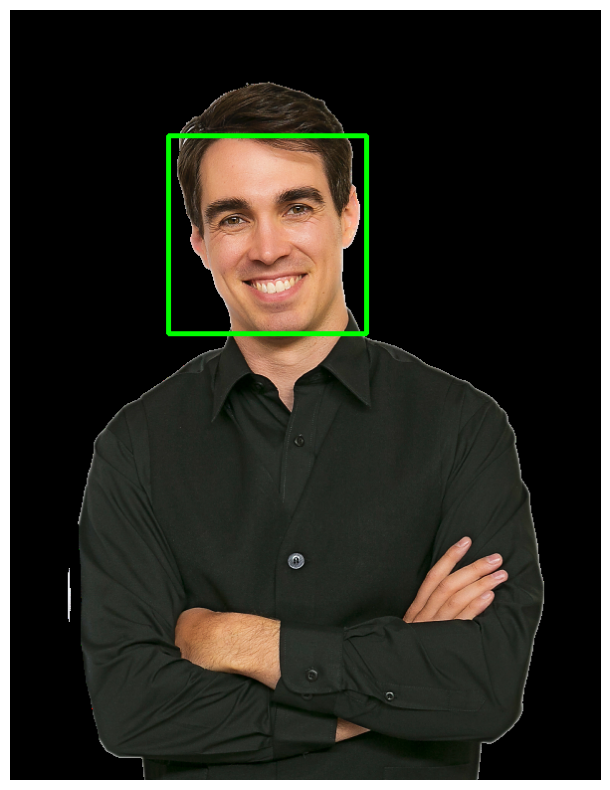

In [20]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [22]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [24]:
video_capture = cv2.VideoCapture(0)

In [27]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [26]:
import cv2

# Load the face classifier
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open the webcam (try changing the index if necessary)
video_capture = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not video_capture.isOpened():
    print("Error: Could not open camera.")
else:
    print("Camera opened successfully!")

def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        # Draw bounding box around faces
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
        # Add text on the video frame indicating a face is detected
        cv2.putText(vid, "Face Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    return faces

while True:
    result, video_frame = video_capture.read()  # Read frames from the video
    if result is False:
        break  # Terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(video_frame)  # Apply the function to the video frame

    # Display the processed frame in a window
    cv2.imshow("My Face Detection Project", video_frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the webcam and close all OpenCV windows
video_capture.release()
cv2.destroyAllWindows()


Camera opened successfully!
